# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.
- se imprtan todas las librerías a utilizar y se leen todos los datasets en una variable correspondiente a cada uno, estableciendo ; como serparador para que se lea correctamente.
- se hace un análisis exploratorio de los datasets usando head, tail, describe e info

In [1]:
import pandas as pd # importar librerías
import numpy as np
from matplotlib import pyplot as plt 

In [2]:
instacart = pd.read_csv ('/datasets/instacart_orders.csv', sep = ';')# leer conjuntos de datos en los DataFrames
products = pd.read_csv ('/datasets/products.csv', sep = ';')
orders = pd.read_csv ('/datasets/order_products.csv', sep = ';')
aisles = pd.read_csv ('/datasets/aisles.csv', sep = ';')
departments = pd.read_csv ('/datasets/departments.csv', sep = ';')

In [3]:
instacart.head()# mostrar información del DataFrame instacart

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [4]:
instacart.tail()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0
478966,2071924,1730,18,1,14,15.0


In [5]:
instacart.describe ()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,4.789670e+05,478967.000000,478967.000000,478967.000000,478967.000000,450148.000000
mean,1.709947e+06,102966.537475,17.157808,2.775058,13.446676,11.101751
std,9.869480e+05,59525.328991,17.704688,2.045869,4.224986,9.189975
min,4.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000
25%,8.564685e+05,51414.000000,5.000000,1.000000,10.000000,4.000000
50%,1.709522e+06,102633.000000,11.000000,3.000000,13.000000,7.000000
75%,2.562990e+06,154419.000000,23.000000,5.000000,16.000000,15.000000
max,3.421079e+06,206209.000000,100.000000,6.000000,23.000000,30.000000


In [6]:
instacart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [7]:
products.head()# mostrar información del DataFrame products 

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
products.tail ()

,product_id,product_name,aisle_id,department_id
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11
49693,49694,BURRITO- STEAK & CHEESE,38,1


In [9]:
products.describe()

,product_id,aisle_id,department_id
count,49694.000000,49694.000000,49694.000000
mean,24847.500000,67.773192,11.728478
std,14345.566475,38.317265,5.850314
min,1.000000,1.000000,1.000000
25%,12424.250000,35.000000,7.000000
50%,24847.500000,69.000000,13.000000
75%,37270.750000,100.000000,17.000000
max,49694.000000,134.000000,21.000000


In [10]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [11]:
orders.head()# mostrar información del DataFrame orders


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [12]:
orders.tail()

,order_id,product_id,add_to_cart_order,reordered
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1
4545006,1398151,28733,9.0,0


In [13]:
orders.describe()

,order_id,product_id,add_to_cart_order,reordered
count,4.545007e+06,4.545007e+06,4.544171e+06,4.545007e+06
mean,1.711166e+06,2.558084e+04,8.351669e+00,5.905025e-01
std,9.850955e+05,1.409552e+04,7.080368e+00,4.917411e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.608170e+05,1.353500e+04,3.000000e+00,0.000000e+00
50%,1.711530e+06,2.527200e+04,6.000000e+00,1.000000e+00
75%,2.561311e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421079e+06,4.969400e+04,6.400000e+01,1.000000e+00


In [14]:
orders.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [15]:
aisles.head()# mostrar información del DataFrame aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [16]:
aisles.tail()

,aisle_id,aisle
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief
133,134,specialty wines champagnes


In [17]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [18]:
departments.head()# mostrar información del DataFrame departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [19]:
departments.tail()

,department_id,department
16,17,household
17,18,babies
18,19,snacks
19,20,deli
20,21,missing


In [20]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.
- podemos observar que tenemos datos nulos en los datasets:
    - dataset instacart: columna days_since_prior_order
    - dataset products: columna product_name  
    - dataset orders: columna add_to_cart_order
- los tipos de datos para todos los valores de todos los datasets parecen ser correctos. 

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.
- en el paso anerior se ha verificado mediante info() que todos los tipos de datos son correctos para todos los valores de los datasets. 
- primero se determian todos los valores duplicados y si se idetifica que se los puede eliminar se los eliminarán para que no ensucien el dataset. Si no se los puede eliminar se determina si nos está contando los ausentes como duplicados. 
- para los ausentes se identifican primero cuales son los valores ausentes, se analiza porqué pueden estar ausentes y se los completa con la información segun corresponda.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [21]:
# Revisa si hay pedidos duplicados
instacart.duplicated ().sum()

15

In [22]:
instacart[instacart.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
- Se tienen 15 duplicados, se estos se puede decir que todos fueron realizados el día miércoles a las 2am. 

In [23]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
instacart [(instacart['order_dow'] == 3) & (instacart ['order_hour_of_day'] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado?
- hay 121 pedidos el miércoles a las 3am por lo que se puede decir que los duplicados se puede haber dado por un error en el sistema justo en ese momento. Es seguro eliminar estas filas duplicadas.

In [24]:
# Elimina los pedidos duplicados
instacart.drop_duplicates (inplace = True)

In [25]:
# Vuelve a verificar si hay filas duplicadas
instacart.duplicated().sum()

0

In [26]:
#se resetea el index para que sea contínuo después de haber eliminado algunas filas. 
instacart.reset_index(inplace = True, drop = True)

In [27]:
instacart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [28]:
# Vuelve a verificar si hay IDs duplicados de pedidos
instacart['order_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos
- ya no se tienen valores duplicados, se eliminaron las 15 filas duplicadas para limpiar el dataset debido a que se puede asumir que fue un error del sistema que duplicó esos pedidos en específico. 

### `products` data frame

In [29]:
# Verifica si hay filas totalmente duplicadas
products.duplicated().sum()

0

In [30]:
# Verifica si hay IDs duplicadas de productos
products['product_id'].duplicated().sum ()

0

In [31]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products ['product_name_lower'] = products['product_name'].str.lower()

In [32]:
products['product_name_lower'].duplicated().sum()

1361

In [33]:
products.duplicated (subset = ['product_id', 'product_name_lower']).sum()

0

In [34]:
# Revisa si hay nombres duplicados de productos no faltantes
products [(products ['product_name_lower'].duplicated()) & ~(products ['product_name_lower'].isna())]

,product_id,product_name,aisle_id,department_id,product_name_lower
2058,2059,Biotin 1000 Mcg,47,11,biotin 1000 mcg
5455,5456,Green Tea With Ginseng and Honey,96,20,green tea with ginseng and honey
5558,5559,Cream Of Mushroom Soup,69,15,cream of mushroom soup
7558,7559,Cinnamon Rolls with Icing,105,13,cinnamon rolls with icing
9037,9038,American Cheese slices,21,16,american cheese slices
...,...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7,high performance energy drink
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14,original pancake & waffle mix
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14,organic instant oatmeal light maple brown sugar
49692,49693,SPRING WATER BODY WASH,127,11,spring water body wash


Describe brevemente tus hallazgos y lo que hiciste con ellos.
- inicialmente se verifica que no se tiene filas completamete duplicadas.
- se identifica que hay 1361 numbres duplicados, pero se puede observar que todos estos nombre tienen un product_id distinto, lo que significa que es un producto diferente pero con el mismo nombre, por lo que no hay colo eliminarlos. 
- son 104 filas con nombres duplicados que hacen referencia a lo mencionado anteriormente. 

### `departments` data frame

In [35]:
# Revisa si hay filas totalmente duplicadas
departments.duplicated().sum()

0

In [36]:
# Revisa si hay IDs duplicadas de departamentos
departments ['department_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.
- no se encontraron filas totalmente duplicadas, ni department_id duplicados por lo que no se hacen modificaciones en el dataset.

### `aisles` data frame

In [37]:
# Revisa si hay filas totalmente duplicadas
aisles.duplicated().sum()

0

In [38]:
# Revisa si hay IDs duplicadas de productos
aisles.duplicated(subset = 'aisle_id').sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.
- no se encontraron filas totalmente duplicadas, ni aisle_id duplicados por lo que no se hacen modificaciones en el dataset.

### `order_products` data frame

In [39]:
# Revisa si hay filas totalmente duplicadas
orders.duplicated().sum()

0

In [40]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
orders.duplicated(subset = ['order_id','product_id']).sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.
- no se encontraron filas totalmente duplicadas, ni order_id con product_id duplicados por lo que no se hacen modificaciones en el dataset.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [41]:
# Encuentra los valores ausentes en la columna 'product_name'
products.isna().sum()

product_id               0
product_name          1258
aisle_id                 0
department_id            0
product_name_lower    1258
dtype: int64

In [42]:
products [products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id,product_name_lower
37,38,NaN,100,21,NaN
71,72,NaN,100,21,NaN
109,110,NaN,100,21,NaN
296,297,NaN,100,21,NaN
416,417,NaN,100,21,NaN
...,...,...,...,...,...
49552,49553,NaN,100,21,NaN
49574,49575,NaN,100,21,NaN
49640,49641,NaN,100,21,NaN
49663,49664,NaN,100,21,NaN


Describe brevemente cuáles son tus hallazgos.
- se encontraron 1258 valores ausentes, y por lo que se puede ver todos vienen del aisle 100 y department 21. Se debe corroborar esos valores. Puede ser que la persona encargada de ese pasillo se olvido de poner los nombres.

In [43]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
products[products ['product_name'].isna()]['aisle_id'].unique()

array([100])

Describe brevemente cuáles son tus hallazgos.
- de determina que todos los ausentes estan relacionados con el pasillo 100.

In [44]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
products[products ['product_name'].isna()]['department_id'].unique()

array([21])

Describe brevemente cuáles son tus hallazgos.
- todos los valores ausentes se relacionan con el departamento 21

In [45]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
aisles [aisles['aisle_id'] == 100 ]

,aisle_id,aisle
99,100,missing


In [46]:
departments [departments['department_id'] == 21]

,department_id,department
20,21,missing


In [47]:
products [(products ['aisle_id'] == 100) & (products ['department_id'] == 21)]

,product_id,product_name,aisle_id,department_id,product_name_lower
37,38,NaN,100,21,NaN
71,72,NaN,100,21,NaN
109,110,NaN,100,21,NaN
296,297,NaN,100,21,NaN
416,417,NaN,100,21,NaN
...,...,...,...,...,...
49552,49553,NaN,100,21,NaN
49574,49575,NaN,100,21,NaN
49640,49641,NaN,100,21,NaN
49663,49664,NaN,100,21,NaN


Describe brevemente cuáles son tus hallazgos.
- se puede identificar que tanto para el pasillo 100 como para el departamento 21 tampoco se tienen los nombres corresponientes para cada dato. Se podría pensar que toda información respecto a ese pasillo, departamento, y productos que contienen no ha sido levantada todavía. 

In [48]:
# Completa los nombres de productos ausentes con 'Unknown'
products ['product_name'] = products ['product_name'].fillna('Unknown')

In [49]:
products ['product_name_lower'] = products ['product_name_lower'].fillna('Unknown')

In [50]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   product_id          49694 non-null  int64 
 1   product_name        49694 non-null  object
 2   aisle_id            49694 non-null  int64 
 3   department_id       49694 non-null  int64 
 4   product_name_lower  49694 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.9+ MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.
- Al identificar que tanto el nombre del departamento y pasillo también están faltando para todos los productos sin nombre, se procede a completar con desconocido ya que no se tiene más información que nos diga algún detalle sobre estos productos.

### `orders` data frame

In [51]:
# Encuentra los valores ausentes
instacart.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [52]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
instacart[instacart ['days_since_prior_order'].isna()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478880,2589657,205028,1,0,16,NaN
478881,2222353,141211,1,2,13,NaN
478907,2272807,204154,1,1,15,NaN
478911,2499542,68810,1,4,19,NaN


In [53]:
#se llena los vacios con 0 
instacart [instacart ['days_since_prior_order'].isna()] ['order_number'].unique()

array([1])

In [54]:
instacart.fillna(0, inplace = True)

In [55]:
instacart.isna().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.
- todos los valores usentes en days_since_prior_order se pueden decir que son validos ya que todos han sido el primer pedido de ese cliente, por lo que no han transcurrido días desde un pedido anterior. Se los llena con 0 para no quedarse con valores ausentes. 

### `order_products` data frame

In [56]:
# Encuentra los valores ausentes
orders.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [57]:
orders [orders ['add_to_cart_order'].isna()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [58]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
orders ['add_to_cart_order'].min()

1.0

In [59]:
orders ['add_to_cart_order'].max()

64.0

In [60]:
# se comprueba para la orden 2926893 cuales son todos sus valores en add to cart order, se ordena los valores y se muestra el tail (50)
orders [orders ['order_id'] == 2926893].sort_values (by = 'add_to_cart_order').tail (50)

,order_id,product_id,add_to_cart_order,reordered
2215295,2926893,17874,43.0,1
1118260,2926893,20383,44.0,1
2383862,2926893,38674,45.0,1
2343425,2926893,14959,46.0,1
728163,2926893,2622,47.0,1
123077,2926893,29565,48.0,1
3411364,2926893,47626,49.0,1
2029729,2926893,41621,50.0,1
2019345,2926893,23049,51.0,1
3368251,2926893,248,52.0,1


Describe brevemente cuáles son tus hallazgos.
- se identifica para esta orden en específico que los valores van de 1 a 64 en la columna add to cart orden y que a partir del 65 ya no se registra el orden de ingreso de los productos. 
- se debe identificar si eso pasa con todos los NaN

In [61]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order', los hago una lista y los ordeno para verlos correctamente.
valor_ausente = sorted(list (orders [orders ['add_to_cart_order'].isna()] ['order_id'].unique()))

In [62]:
print (valor_ausente)

[9310, 61355, 102236, 129627, 165801, 171934, 180546, 264710, 293169, 388234, 404157, 678116, 733526, 747668, 813364, 844733, 854647, 871281, 888470, 903110, 936852, 1021563, 1038146, 1169835, 1183255, 1220886, 1302315, 1308785, 1386261, 1477139, 1529171, 1564093, 1598369, 1625713, 1633337, 1648217, 1673227, 1677118, 1713430, 1717990, 1730767, 1800005, 1832957, 1888628, 1916118, 1959075, 1961723, 1968313, 2094761, 2136777, 2170451, 2256933, 2409109, 2449164, 2470674, 2479011, 2621907, 2625444, 2652650, 2721963, 2729254, 2849370, 2926893, 2979697, 2997021, 2999801, 3125735, 3308010, 3347453, 3383594]


In [63]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
orders [orders ['order_id'].isin (valor_ausente)].groupby ('order_id') ['product_id'].count().sort_values()

order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 70, dtype: int64

Describe brevemente cuáles son tus hallazgos.
- se verifica que el valor mínimo es 65 por lo que se comprueba que todos los productos que fueron ingresados al carrito a partir de la posición 65 presentaron un error y no se registraton correctamente. 

In [64]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
orders ['add_to_cart_order'].fillna(999, inplace = True)

In [65]:
orders.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [66]:
orders.dtypes

order_id               int64
product_id             int64
add_to_cart_order    float64
reordered              int64
dtype: object

In [67]:
orders ['add_to_cart_order'] = orders ['add_to_cart_order'].astype ('int')

In [68]:
orders.dtypes

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

Describe brevemente tus hallazgos y lo que hiciste con ellos.
- una vez identificada la razón de los valores ausentes en la columna add to cart order en la que se comprueba que a partir del pedido que ingreso al carrito en la posición 65 se presentó un erros en el sistema y estos no fueron registrados. Al no tener una hora como para saber el orden de los pedidos ingresados y remplazar por sus valores correspondientes, se los reemplaza con 999 para que no causen problema y así completar los valores ausentes para los siguientes análisis. 
-Ademas se transforma la columna a entero.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
- es importante siempre que se empieza a trabajar con dataset, limpiarlos de la manera correcta, empezando por veer la información de cada uno, pasar a valores duplicados, aquí se debe identificar la razón de los duplicados y si es conveniente eliminarlos o no. Después de analiza valos ausentes y se debe entender o tratar de encontrar la razón de por qué quedaron ausentes. Una vez que se tenga este análisis se debe rellenar los valores ausentes con valores que no afecten a los cálculos posteriores a realizar.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [69]:
print (instacart ['order_hour_of_day'].min())
print (instacart ['order_hour_of_day'].max())

0
23


In [70]:
print (instacart ['order_dow'].min())
print (instacart ['order_dow'].max())

0
6


Escribe aquí tus conclusiones
- se verifica que las horas del día van de 0h a 23h contemplando las 24 horas del día.
- se verifica que los días de la semana van de 0 a 6, donde 0 es domingo y 6 sábado, contemplando los 7 días de la semana.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

In [71]:
#se agrupa por hora de día y se cuenta la cantidad de personas que han realizado una compra.
hora_del_dia = instacart.groupby('order_hour_of_day')['user_id'].count().sort_index()

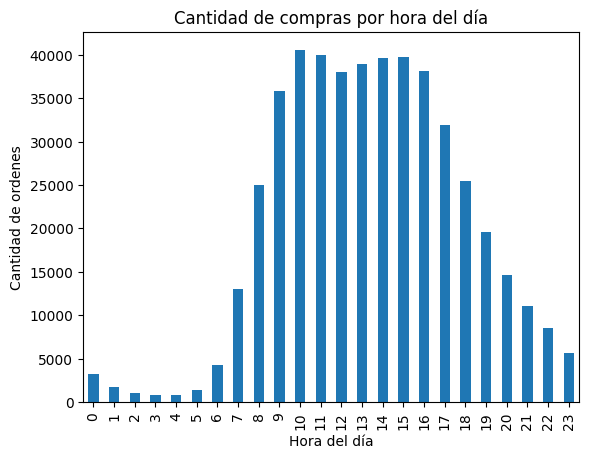

In [72]:
hora_del_dia.plot(kind = 'bar', title = 'Cantidad de compras por hora del día', xlabel = 'Hora del día', ylabel = 'Cantidad de ordenes')
plt.show()

Escribe aquí tus conclusiones
- Mediante este grafico se puede decir que entre las 10 am y 4pm es cuando mas personas realizan compras. Se podria decir que esto es durante horario labora, sin embargo no se puede generaizar que para todos los dias de la semana los pedidos se comportan así. 
- Ademas se puede decir que en la hora del almuerzo se reduce un poco la cantidad de pedidos 

### [A3] ¿Qué día de la semana compran víveres las personas?

In [73]:
#se cuentan los valores para saber que día es el que más en repite en las compras
dia_de_la_semana = instacart ['order_dow'].value_counts().sort_index()

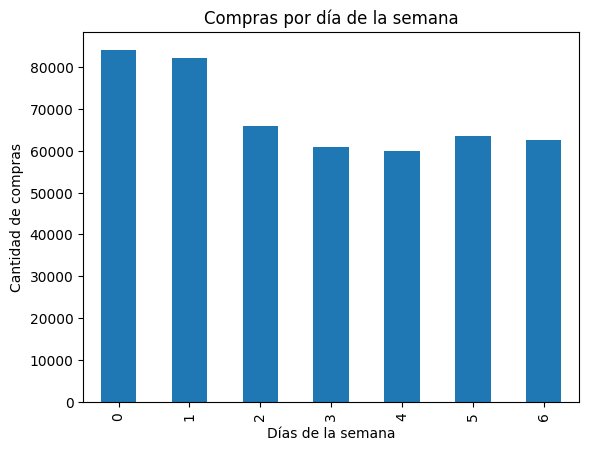

In [74]:
dia_de_la_semana.plot(kind = 'bar', title = 'Compras por día de la semana', xlabel = "Días de la semana", ylabel = "Cantidad de compras")
plt.show()

Escribe aquí tus conclusiones
- Según lo que el gráfico "Compras por día se la semana" nos dice, el día domingo es el que más compras hace la gente, seguido del día lunes.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [75]:
#se cuenta las repeticiones de la cantidad de días que espera una persona para volver a hacer un pedido
espera = instacart ['days_since_prior_order'].value_counts()

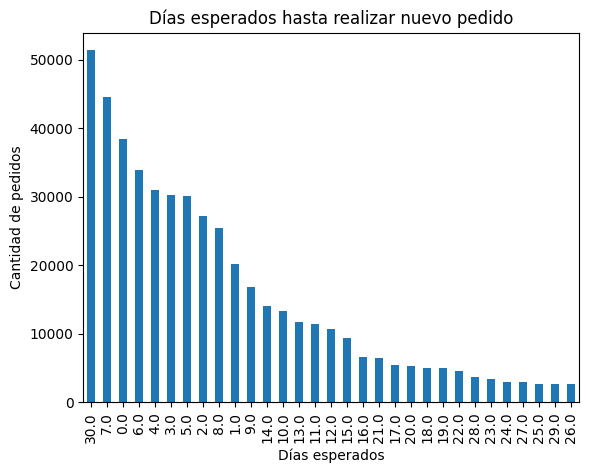

In [76]:
espera.plot(kind = 'bar', title = 'Días esperados hasta realizar nuevo pedido', xlabel  = 'Días esperados', ylabel = 'Cantidad de pedidos')
plt.show()

Escribe aquí tus conclusiones
- El gráfico "Días esperados hasta realizar nuevo pedido", nos dice que la mayor cantidad de personas esperan hasta 30 días para volver a hacer un pedido. Esto nos dice que las personas realizan las compras necesarias para abastecerse durante 1 mes entero. 
- Muy pocos pedidos se realizan después de 26 días, el cual se puede que es el día con menor ocurrencia, podría ser que las compras no le alcanzaron para 1 mes. 
- Se puede ver también que el 0 es el día con mayor ocurrencia, sin embargo, es importante aclarar que el 0 representa a los clientes que han hecho por primera vez una compra, así como también a los que hicieron una compra el día que se extrajo el dataset, por lo que no es un dato real. 

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [77]:
#filtrar para el día miércoles y contar las repeticiones de las horas del día en que se hacen pedidos. 
miercoles = instacart [instacart ['order_dow'] == 3]['order_hour_of_day'].value_counts ().sort_index()

In [78]:
#filtrar para el día sabado y contar las repeticiones de las horas del día en que se hacen pedidos.
sabado = instacart [instacart ['order_dow'] == 6]['order_hour_of_day'].value_counts ().sort_index()

In [79]:
#concatenar las 2 tablas creadas para después hacer un gráfico de esta
comparacion = pd.concat ([miercoles, sabado], axis = 1)

In [80]:
#renombrar las columnas
comparacion.columns = ['Miercoles', 'Sabado']
comparacion

,Miercoles,Sabado
0,373,464
1,215,254
2,106,177
3,101,125
4,108,118
5,170,161
6,643,451
7,1732,1619
8,3125,3246
9,4490,4311


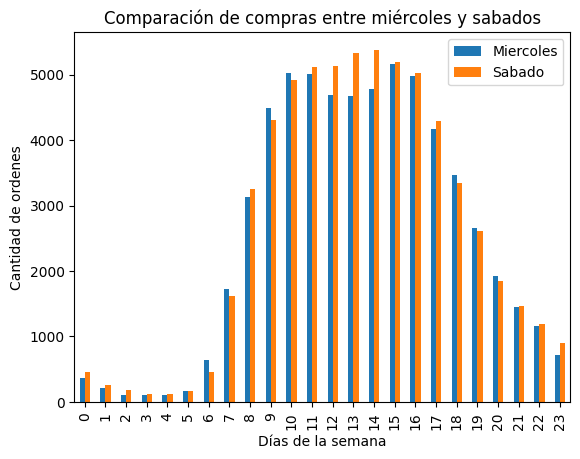

In [81]:
comparacion.plot(kind = 'bar', title = 'Comparación de compras entre miércoles y sabados', xlabel = 'Días de la semana', ylabel = 'Cantidad de ordenes')
plt.show()

Escribe aquí tus conclusiones
- Al comprar la cantidad de compras entre los días miércoles y sabados, se puede ver que la tendencia general no se mantiene. Para el día sabado, la cantidad de compras va aumentando hasta las 2 de la tarde , a comparación del día miércoles que en el periodo de almuerzo laboral se reduce la cantidad de compras. 
- Se puede decir que el día sabado se realizan más compras en general.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [82]:
#se cuenta las repeticiones del numero de orden de los clientes.
#instacart.groupby('order_number') ['user_id'].count().sort_index() tambien se puede hacer asi
pedidos_total = instacart['order_number'].value_counts().sort_index()
pedidos_total

1      28817
2      28633
3      28685
4      28703
5      25661
       ...  
96       220
97       221
98       191
99       169
100      194
Name: order_number, Length: 100, dtype: int64

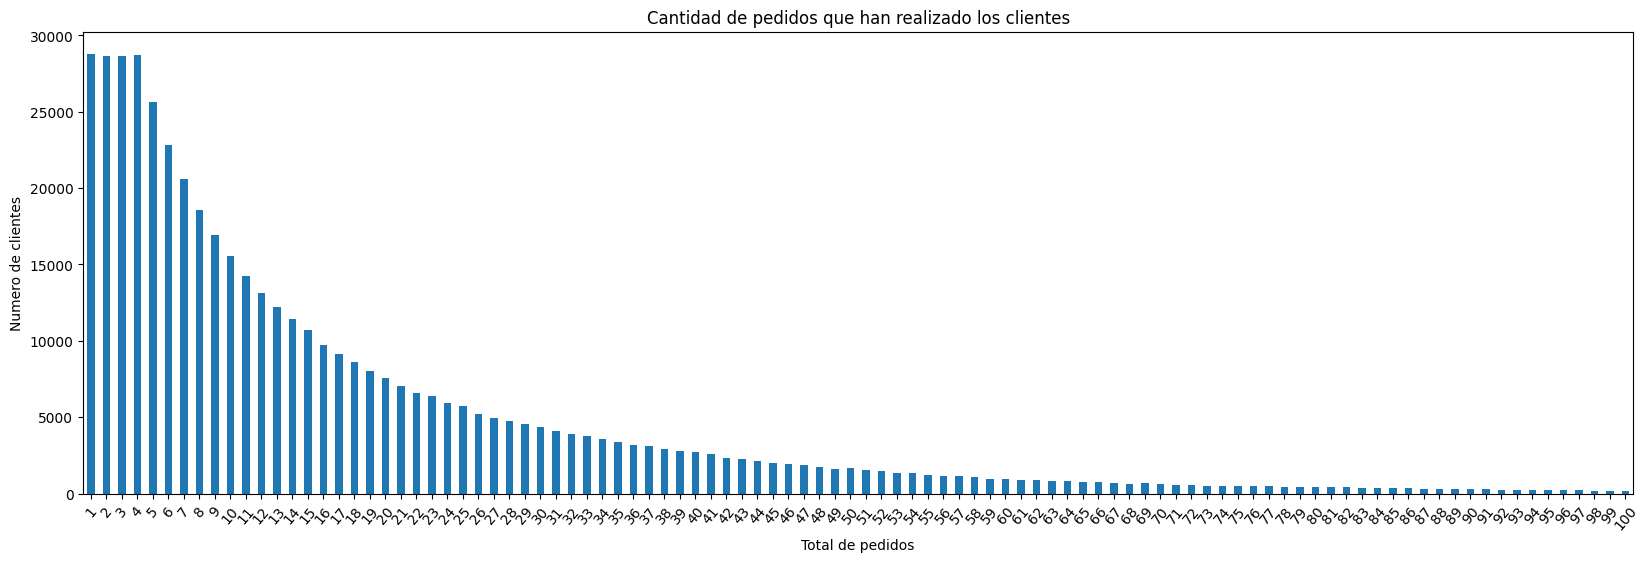

In [83]:
pedidos_total.plot(kind = 'bar', 
                   xlabel = 'Total de pedidos', 
                   ylabel = 'Numero de clientes', 
                   title = 'Cantidad de pedidos que han realizado los clientes', 
                   rot = 50, 
                   figsize = [20,6])
plt.show()

Escribe aquí tus conclusiones
- A partir de la gráfica se puede ver que la mayor cantidad de personas han realizado entre 1 y 4 pedidos en total, mientras que muy pocas personas han llegado a realizar 100 pedidos. 
- Se podría pensar que la empresa ha estado atrayendo una gran cantidad de nuevos cleintes en los últimos meses.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [84]:
#contar cuantas veces se ha pedido un producto y mostrar los 20 mas populares, trasformar a Dataframe y dar nombre a las columnas
pop = orders ['product_id'].value_counts().head(20)
populares = pop.reset_index()
populares.columns = ['product_id', 'veces_comprado']
populares

,product_id,veces_comprado
0,24852,66050
1,13176,53297
2,21137,37039
3,21903,33971
4,47209,29773
5,47766,24689
6,47626,21495
7,16797,20018
8,26209,19690
9,27845,19600


In [85]:
#seleccionar solo las columnas necesarias de mi tabla products 
nombres = products [['product_id', 'product_name_lower']]
nombres

,product_id,product_name_lower
0,1,chocolate sandwich cookies
1,2,all-seasons salt
2,3,robust golden unsweetened oolong tea
3,4,smart ones classic favorites mini rigatoni wit...
4,5,green chile anytime sauce
...,...,...
49689,49690,high performance energy drink
49690,49691,original pancake & waffle mix
49691,49692,organic instant oatmeal light maple brown sugar
49692,49693,spring water body wash


In [86]:
#se unen las 2 tablas creadas para poder mostrar el product_id con el Product_name
_20populares = populares.merge(nombres, on = 'product_id')
_20populares

,product_id,veces_comprado,product_name_lower
0,24852,66050,banana
1,13176,53297,bag of organic bananas
2,21137,37039,organic strawberries
3,21903,33971,organic baby spinach
4,47209,29773,organic hass avocado
5,47766,24689,organic avocado
6,47626,21495,large lemon
7,16797,20018,strawberries
8,26209,19690,limes
9,27845,19600,organic whole milk


In [87]:
#se elimina a columna veces comprado para que solo se vea lo soliictado 
print (_20populares.drop ('veces_comprado', axis = 'columns'))

    product_id        product_name_lower
0        24852                    banana
1        13176    bag of organic bananas
2        21137      organic strawberries
3        21903      organic baby spinach
4        47209      organic hass avocado
5        47766           organic avocado
6        47626               large lemon
7        16797              strawberries
8        26209                     limes
9        27845        organic whole milk
10       27966       organic raspberries
11       22935      organic yellow onion
12       24964            organic garlic
13       45007          organic zucchini
14       39275       organic blueberries
15       49683            cucumber kirby
16       28204        organic fuji apple
17        5876             organic lemon
18        8277  apple honeycrisp organic
19       40706    organic grape tomatoes


Escribe aquí tus conclusiones
- Se obtienen los 20 productos mas comprados con sus nombres y id. 
- se puede ver que todos los productos son frutas, legumbres y leche.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [88]:
#se agrupa por order id y se cuentan la cantidad de productos dentro de cada orden 
articulos = orders.groupby ('order_id')['product_id'].count()
articulos.head(10)

order_id
4     13
9     15
11     5
19     3
20     8
31    10
48     8
56    10
61    12
68     9
Name: product_id, dtype: int64

In [89]:
#se muestra la descripcion para ver la distribucion solicitada
articulos.describe()

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64

Escribe aquí tus conclusiones
- En promedio las personas compran 10 articulos por pedido, siendo 1 la menor cantidad de articulos comprados y 127 la mayor cantidad de articulos comprados. 

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [90]:
#filtro los productos que han sido recomprados 
recompra = orders [orders ['reordered'] == 1]
recompra

,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
5,2456893,21616,4,1
...,...,...,...,...
4544999,1622300,24852,1,1
4545000,1125324,40600,6,1
4545002,577211,15290,12,1
4545004,692640,47766,4,1


In [91]:
#Creo un nuevo dataframe donde ya se encuentran los 20 prodcutos que mas se han recomprado
compra = recompra.groupby ('product_id')['reordered'].count().sort_values(ascending = False).head(20)
recompra2 = compra.reset_index()
recompra2.columns = ['product_id', 'total_recomprado']
recompra2

,product_id,total_recomprado
0,24852,55763
1,13176,44450
2,21137,28639
3,21903,26233
4,47209,23629
5,47766,18743
6,27845,16251
7,47626,15044
8,27966,14748
9,16797,13945


In [92]:
#uno con mi tabla nombres creada anteriormente para mostar el nombre del producto con el id
recompra3 = recompra2.merge(nombres, on = 'product_id')
recompra3

,product_id,total_recomprado,product_name_lower
0,24852,55763,banana
1,13176,44450,bag of organic bananas
2,21137,28639,organic strawberries
3,21903,26233,organic baby spinach
4,47209,23629,organic hass avocado
5,47766,18743,organic avocado
6,27845,16251,organic whole milk
7,47626,15044,large lemon
8,27966,14748,organic raspberries
9,16797,13945,strawberries


In [93]:
print (recompra3.drop('total_recomprado', axis = 'columns'))

    product_id        product_name_lower
0        24852                    banana
1        13176    bag of organic bananas
2        21137      organic strawberries
3        21903      organic baby spinach
4        47209      organic hass avocado
5        47766           organic avocado
6        27845        organic whole milk
7        47626               large lemon
8        27966       organic raspberries
9        16797              strawberries
10       26209                     limes
11       22935      organic yellow onion
12       24964            organic garlic
13       45007          organic zucchini
14       49683            cucumber kirby
15       28204        organic fuji apple
16        8277  apple honeycrisp organic
17       39275       organic blueberries
18        5876             organic lemon
19       49235       organic half & half


Escribe aquí tus conclusiones
- se presentan los 20 productos que mas veces se piden. 
- al comprarar con los 20 producos mas populares, se puede ver que la mayoria son los mismos productos, esto tiene sentido ya que al ser los mas populares (los que mas se compran), tambien quiere decir que con los que mas se han recomprado. 

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [94]:
#combino mis tablas orders y products 
df_merge = orders.merge(products, on ='product_id')

In [95]:
#agrupo por el id y nombre del producto y saco la proporcion del reorden y se calcula la media que en este caso da la proporcion
tasa_reorder = df_merge.groupby (['product_id', 'product_name_lower'])['reordered'].mean()
tasa_reorder

product_id  product_name_lower                                               
1           chocolate sandwich cookies                                           0.564286
2           all-seasons salt                                                     0.000000
3           robust golden unsweetened oolong tea                                 0.738095
4           smart ones classic favorites mini rigatoni with vodka cream sauce    0.510204
7           pure coconut water with orange                                       0.500000
                                                                                   ...   
49690       high performance energy drink                                        0.800000
49691       original pancake & waffle mix                                        0.430556
49692       organic instant oatmeal light maple brown sugar                      0.416667
49693       spring water body wash                                               0.440000
49694       burrito- s

In [96]:
#se convierte en  dataframe 
proporcion = tasa_reorder.reset_index()

In [97]:
#se ordena por product id 
proporcion.sort_values (by = 'product_id')

,product_id,product_name_lower,reordered
0,1,chocolate sandwich cookies,0.564286
1,2,all-seasons salt,0.000000
2,3,robust golden unsweetened oolong tea,0.738095
3,4,smart ones classic favorites mini rigatoni wit...,0.510204
4,7,pure coconut water with orange,0.500000
...,...,...,...
45568,49690,high performance energy drink,0.800000
45569,49691,original pancake & waffle mix,0.430556
45570,49692,organic instant oatmeal light maple brown sugar,0.416667
45571,49693,spring water body wash,0.440000


Escribe aquí tus conclusiones
- Se ha calculado la proporcion de reorden de los productos, la cual se puede ver en la tabla proporcion. 
- una proporcion de reorden alta (cerca a 1) quiere decir que los cliente estan satisfechos con ese producto por eso lo vuelven a pedir como el producto 'high performance energy drink	' que se puede ver en la tabla que tienen 0.80 de reorden.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [98]:
#uno las tablas de instacart y orders 
merge = instacart.merge(orders, on='order_id')

In [99]:
#agrupo por el userid y id del producto y saco la proporcion del reorden y se calcula la media que en este caso da la proporcion de reorden para cada producto por cliente
merge_fil = merge.groupby(['user_id', 'product_id'])['reordered'].mean()
merge_fil

user_id  product_id
2        9681          0.0
         12000         0.0
         13176         0.0
         16589         0.0
         20574         0.0
                      ... 
206209   39216         0.0
         40992         0.0
         41213         1.0
         41665         0.0
         43961         0.0
Name: reordered, Length: 3381866, dtype: float64

In [100]:
#reseteo el index para transformar a dataframe
merge_fil2 = merge_fil.reset_index()

In [101]:
#ordeno el dataframe por user_id y proporcion de reorden
merge_fil2_sorted = merge_fil2.sort_values(by=['user_id'])

In [102]:
merge_fil2_sorted

,user_id,product_id,reordered
0,2,9681,0.0
24,2,49451,0.0
23,2,48110,0.0
22,2,47766,0.0
21,2,47209,0.0
...,...,...,...
3381843,206209,2295,0.0
3381842,206209,2280,0.0
3381841,206209,1979,0.0
3381852,206209,22713,0.0


In [103]:
merge_fil2_sorted['reordered'].unique()

array([0.        , 0.5       , 1.        , 0.66666667, 0.75      ,
       0.8       , 0.875     , 0.85714286, 0.9       , 0.83333333,
       0.88888889, 0.90909091, 0.91666667, 0.92857143, 0.92307692,
       0.93333333, 0.94444444, 0.94117647, 0.9375    , 0.95      ,
       0.94736842])

Escribe aquí tus conclusiones
- Una proporcion de reorden alta quiere decir que el cliente le gusta el producto y  lo compra continuamente, una proporcion baja quiere decir que lo compro y no le gusto o que estaba probando diferentes productos. 

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [107]:
#filtro por los productos que han sido agregagos en posicion 1
principales = orders.query('add_to_cart_order == 1')
principales

,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1
2,2261212,26683,1,1
14,1961225,37553,1,1
16,639939,10017,1,1
23,750040,8518,1,0
...,...,...,...,...
4544978,1759009,46175,1,0
4544989,115427,20842,1,1
4544990,2049780,28576,1,1
4544997,2300092,10017,1,0


In [125]:
#agrupo por product id y cuento cuantas veces han sido agregados primero 
prin_ord = principales.groupby('product_id')['add_to_cart_order'].count().sort_values(ascending = False).head(20)

In [126]:
#creo un dataframe y cambio nombres columnas, muestro los 20 principales
orden_agregado = prin_ord.reset_index()
orden_agregado.columns = ['product_id', 'Cantidad_veces_ingresado_1']
orden_agregado

,product_id,Cantidad_veces_ingresado_1
0,24852,15562
1,13176,11026
2,27845,4363
3,21137,3946
4,47209,3390
5,21903,3336
6,47766,3044
7,19660,2336
8,16797,2308
9,27966,2024


In [127]:
#se une con la tabla nombres creada anteriormente para presentar el nombre del producto tambien 
orden_final = orden_agregado.merge (nombres, on = 'product_id')
orden_final

,product_id,Cantidad_veces_ingresado_1,product_name_lower
0,24852,15562,banana
1,13176,11026,bag of organic bananas
2,27845,4363,organic whole milk
3,21137,3946,organic strawberries
4,47209,3390,organic hass avocado
5,21903,3336,organic baby spinach
6,47766,3044,organic avocado
7,19660,2336,spring water
8,16797,2308,strawberries
9,27966,2024,organic raspberries


Escribe aquí tus conclusiones
- se pueden ver los 20 principales productos que se agregan primero a los carritos. Se podria decir que son productos de uso diario especilmente pasa desayunos y frutas que por lo general tienen una corta duracion, razon por la cual se los compra mas veces. 

### Conclusion general del proyecto:

- Es sumamente importante limpiar los datos correctamente antes de empezar a analizarlos para evitar respuestas erronesas.
- se puede concluir que la gente tiende a comprar mas durante las 10 a 5pm, tanto entre semanan como los fines de semana, pero sus tendencias son diferentes por lo que no se puede generalizar que siempre va a pasar eso. Se deberia analizar tambien dias festivos para ver los comportamiento de compra vs los normales.
- lo que mas compra la gente son productos de uso diario para desayunos ya que por lo general tinen corta duracion. 
- el promedio de articulo comprados en una orden es de 10 productos. 
- la cantidad de dias que mas espera la gente para volver a comprar son 30 dias, lo que nos da a entender que hace compras para abstecer 1 mes entero.
- el producto que mas se compra son las bananas. 